In [4]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
s = json.load( open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json') )
pl.rcParams.update(s)
pl.rcParams.update({'figure.autolayout': True})
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
#load Boro taxi data for 2014-06-02 to 2014-06-08
df=pd.read_csv('borotaxi_201406.csv')
print df.columns
df.head()

Index([u'lpep_pickup_datetime', u'Lpep_dropoff_datetime', u'Passenger_count',
       u'Trip_distance', u'Fare_amount', u'Extra', u'MTA_tax', u'Tip_amount',
       u'Tolls_amount', u'Total_amount', u'Payment_type', u'Trip_type',
       u'PickupDate', u'PickupMonth', u'PickupDay', u'PickupHour',
       u'DropoffDate', u'DropoffMonth', u'DropoffDay', u'DropoffHour',
       u'TripTime'],
      dtype='object')


,lpep_pickup_datetime,Lpep_dropoff_datetime,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Total_amount,...,Trip_type,PickupDate,PickupMonth,PickupDay,PickupHour,DropoffDate,DropoffMonth,DropoffDay,DropoffHour,TripTime
0,2014-06-02 00:00:02,2014-06-02 00:11:22,1,1.63,9.5,0.5,0.5,0.00,0,10.50,...,1,6/2/2014,6,2,0,6/2/2014,6,2,0,680
1,2014-06-02 00:00:02,2014-06-02 00:13:02,1,3.00,10.0,0.0,0.0,0.00,0,10.00,...,2,6/2/2014,6,2,0,6/2/2014,6,2,0,780
2,2014-06-02 00:00:04,2014-06-02 00:05:19,1,1.10,6.0,0.5,0.5,1.75,0,8.75,...,1,6/2/2014,6,2,0,6/2/2014,6,2,0,315
3,2014-06-02 00:00:05,2014-06-02 00:35:31,1,16.20,47.5,0.5,0.5,0.00,0,48.50,...,1,6/2/2014,6,2,0,6/2/2014,6,2,0,2126
4,2014-06-02 00:00:09,2014-06-02 00:14:14,1,5.40,17.0,0.5,0.5,0.00,0,18.00,...,1,6/2/2014,6,2,0,6/2/2014,6,2,0,845


In [7]:
df['PUdate'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['DOdate'] = pd.to_datetime(df['Lpep_dropoff_datetime'])
print df.PUdate.head()

#series = pd.Series(df, index=df.PUdate)
#print series
#df.set_index(['PUdate'],inplace=True)

0   2014-06-02 00:00:02
1   2014-06-02 00:00:02
2   2014-06-02 00:00:04
3   2014-06-02 00:00:05
4   2014-06-02 00:00:09
Name: PUdate, dtype: datetime64[ns]


In [8]:
#See the trip information of the highest tip amount
print df.loc[df['Tip_amount'].idxmax()]

lpep_pickup_datetime     2014-06-08 03:15:27
Lpep_dropoff_datetime    2014-06-08 04:04:45
Passenger_count                            1
Trip_distance                          37.62
Fare_amount                             97.5
Extra                                    0.5
MTA_tax                                  0.5
Tip_amount                            111.11
Tolls_amount                               0
Total_amount                          209.61
Payment_type                               1
Trip_type                                  1
PickupDate                          6/8/2014
PickupMonth                                6
PickupDay                                  8
PickupHour                                 3
DropoffDate                         6/8/2014
DropoffMonth                               6
DropoffDay                                 8
DropoffHour                                4
TripTime                                2958
PUdate                   2014-06-08 03:15:27
DOdate    

/home/jannie/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


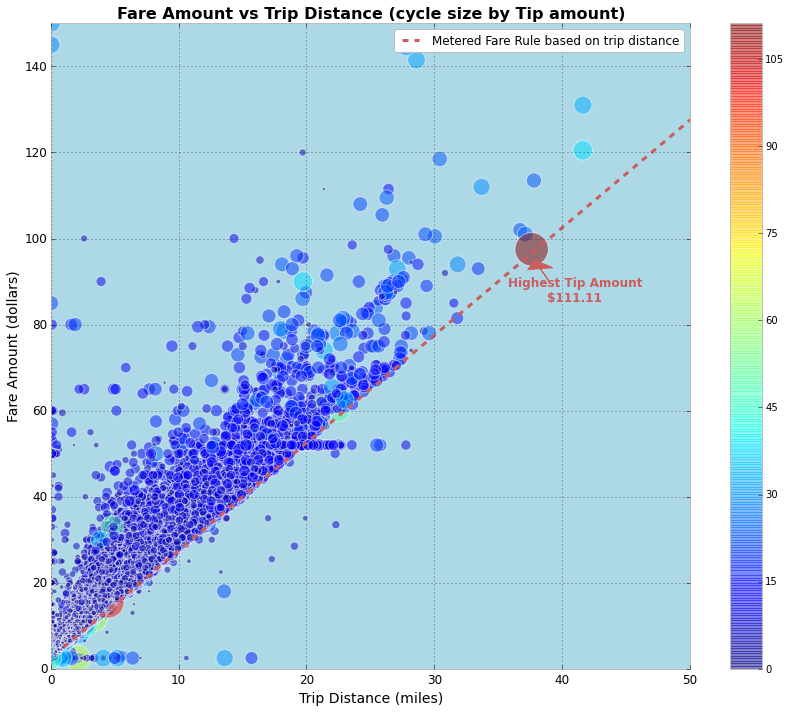

In [9]:
fig = pl.figure()
ax = df.plot(kind='scatter', x='Trip_distance', y='Fare_amount', sharex=False, xlim=(0,50), ylim=(0,150), marker='o', alpha=0.5, figsize=(12, 10), fontsize=12, colormap='jet',c=df['Tip_amount'], s=df['Tip_amount']*10)
#think there's a bug here that xaxis is not shown in the plor
#I have to add sharex=False to get my xaxis back...

ax.set_axis_bgcolor('lightblue')
ax.set_xlabel('Trip Distance (miles)',size=14)
ax.set_ylabel('Fare Amount (dollars)',size=14)
pl.title('Fare Amount vs Trip Distance (cycle size by Tip amount)', fontsize=16, fontweight='bold')

x=np.arange(1,100,1)
y = 2.5+0.5*x/0.2

pl.plot(x,y, lw=3, color='indianred', linestyle='--', label='Metered Fare Rule based on trip distance')
ax.legend()
text(41, 88, 'Highest Tip Amount\n$111.11',
        horizontalalignment='center',
        verticalalignment='center',
        #rotation=45,
        fontsize=12, color='indianred', fontweight='bold')
ax.arrow(39, 90, -0.7, 3, head_width=2, head_length=2, fc='indianred', ec='indianred')

#fig.savefig('HW8.png', dpi=600) 
